In [2]:
from backtests import backtest_Lasso, backtest_XGBoost, backtest_OLS
import datetime as dt
import statsmodels.api as sm
import pandas as pd
import numpy as np
import warnings

from tqdm.auto import tqdm
from IPython.display import clear_output

warnings.filterwarnings('ignore')

c:\Users\mikol\Desktop\Master thesis\mcut_feature_selection\mcut_venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
data = pd.read_pickle('../data/broaded_df')

In [4]:
strategy2backtest = {
    backtest_Lasso: 'lasso_feature_selection',
    backtest_OLS: ['correlation_features', 'RFE_feature_selection', 'sequential_feature_selection', 'relief_algorithm', 'mcut_feature_selection'],
    backtest_XGBoost: 'xgboost_feature_selection'
}

backtest2strategy = {
    'lasso_feature_selection': backtest_Lasso,
    'correlation_features': backtest_OLS,
    'RFE_feature_selection': backtest_OLS,
    'sequential_feature_selection': backtest_OLS,
    'relief_algorithm': backtest_OLS,
    'mcut_feature_selection': backtest_OLS,
    'xgboost_feature_selection': backtest_XGBoost
}


In [5]:

def mean_std(x):
    x = x.copy()
    """Function to calculate mean to std ratio"""
    if np.std(x) == 0:
        return 0
    x = x.copy()
    return np.mean(x) / np.std(x)

def winrate(x):
    x = x.copy()
    return x[x>0].shape[0]/x.shape[0]

In [18]:
import os
pnls = {}
res = pd.DataFrame(columns=['strategy', 'mean', 'count', 'sum', 'winrate', 'mean_std'])
for strat in ['lasso_feature_selection','correlation_features', 'RFE_feature_selection', 'sequential_feature_selection', 'relief_algorithm', 'mcut_feature_selection','xgboost_feature_selection']:
    for sub_results in [name for name in os.listdir('data') if (strat in name) & ('std' not in name) ]:
        print(sub_results)
        data = pd.read_pickle('../data/broaded_df')
        d, pvs = backtest2strategy[strat](data, pd.read_pickle(f'../data/{sub_results}')[:-1], 'train')
        pnl = (np.sign(d.pred) * d.marg).dropna()
        res.loc[sub_results] = [strat, pnl.mean(), pnl.count(), pnl.sum(), winrate(pnl), mean_std(pnl)]
        pnls[sub_results] = pnl
        clear_output()  

In [9]:
# res.to_pickle('../data/experiment_5_results_standard_train.pkl')
res = pd.read_pickle('../data/experiment_5_results_standard_train.pkl')

In [21]:
# save pnls to pickle
# import pickle
# with open('../data/experiment_5_pnls_standard_train.pkl', 'wb') as f:
#     pickle.dump(pnls, f)

In [6]:
pnls = pd.read_pickle('../data/experiment_5_pnls_standard_train.pkl')

In [10]:
pnls.keys()

dict_keys(['lasso_feature_selection_0.1.pkl', 'lasso_feature_selection_0.5.pkl', 'lasso_feature_selection_1.pkl', 'lasso_feature_selection_10.pkl', 'lasso_feature_selection_5.pkl', 'correlation_features_10.pkl', 'correlation_features_15.pkl', 'correlation_features_20.pkl', 'correlation_features_25.pkl', 'correlation_features_5.pkl', 'RFE_feature_selection_10.pkl', 'RFE_feature_selection_15.pkl', 'RFE_feature_selection_20.pkl', 'RFE_feature_selection_25.pkl', 'RFE_feature_selection_5.pkl', 'sequential_feature_selection_10.pkl', 'sequential_feature_selection_15.pkl', 'sequential_feature_selection_20.pkl', 'sequential_feature_selection_25.pkl', 'sequential_feature_selection_5.pkl', 'relief_algorithm_10.pkl', 'relief_algorithm_15.pkl', 'relief_algorithm_20.pkl', 'relief_algorithm_25.pkl', 'relief_algorithm_5.pkl', 'mcut_feature_selection_100.pkl', 'mcut_feature_selection_125.pkl', 'mcut_feature_selection_150.pkl', 'mcut_feature_selection_50.pkl', 'mcut_feature_selection_75.pkl', 'xgboost_f

In [14]:
import matplotlib.pyplot as plt

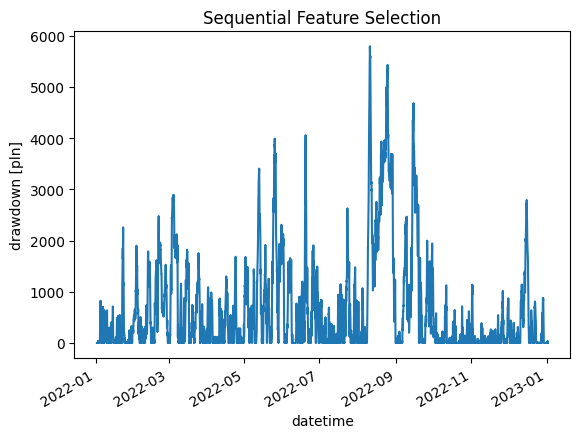

In [16]:
(pnls['sequential_feature_selection_20.pkl'].cumsum().cummax() - pnls['sequential_feature_selection_20.pkl'].cumsum()).plot()
plt.title('Sequential Feature Selection')
plt.ylabel('drawdown [pln]')
plt.xlabel('datetime')
plt.savefig('charts/exp5_seq_standard_drawdowns.png')

In [10]:
results = res.round(2).sort_values(['mean_std', 'winrate'])

In [55]:
results.groupby('strategy').apply(lambda x: x[(x['mean_std']==x['mean_std'].max())]).sort_values(['winrate', 'sum'], ascending=False).reset_index(drop=True).groupby('strategy').head(1).reset_index(drop=1)

,strategy,mean,count,sum,winrate,mean_std
0,sequential_feature_selection,29.82,8759,261187.96,0.62,0.30
1,correlation_features,23.08,8759,202187.30,0.61,0.23
2,relief_algorithm,22.36,8759,195883.62,0.60,0.22
3,xgboost_feature_selection,18.94,8759,165923.24,0.60,0.18
4,mcut_feature_selection,19.38,8759,169786.64,0.58,0.19
5,RFE_feature_selection,17.21,8759,150764.02,0.58,0.17
6,lasso_feature_selection,13.61,8759,119205.88,0.56,0.13


In [44]:
results.groupby('strategy').apply(lambda x: x[(x['mean_std']==x['mean_std'].max())])
                                            #   &
                                            #   (x['winrate']==x['winrate'].max()) &
                                            #   (x['sum']==x['sum'].max())]).sort_values('mean_std',ascending=False)

strategy  \
strategy                                                                                         
RFE_feature_selection        RFE_feature_selection_5.pkl                 RFE_feature_selection   
correlation_features         correlation_features_10.pkl                  correlation_features   
                             correlation_features_5.pkl                   correlation_features   
lasso_feature_selection      lasso_feature_selection_0.5.pkl           lasso_feature_selection   
                             lasso_feature_selection_1.pkl             lasso_feature_selection   
                             lasso_feature_selection_10.pkl            lasso_feature_selection   
                             lasso_feature_selection_5.pkl             lasso_feature_selection   
mcut_feature_selection       mcut_feature_selection_100.pkl             mcut_feature_selection   
                             mcut_feature_selection_125.pkl             mcut_feature_selection   
                             mcut_feature_selection_150.pkl             mcut_feature_selection   
                             mcut_feature_selection_50.pkl              mcut_feature_selection   
                             mcut_feature_selection_75.pkl              mcut_feature_selection   
relief_algorithm             relief_algorithm_20.pkl                          relief_algorithm   
sequential_feature_selection sequential_feature_selection_20.pkl  sequential_feature_selection   
xgboost_feature_selection    xgboost_feature_selection_20.pkl        xgboost_feature_selection   
                             xgboost_feature_selection_15.pkl        xgboost_feature_selection   

                                                                   mean  \
strategy                                                                  
RFE_feature_selection        RFE_feature_selection_5.pkl          17.21   
correlation_features         correlation_features_10.pkl          23.31   
                             correlation_features_5.pkl           23.08   
lasso_feature_selection      lasso_feature_selection_0.5.pkl      13.49   
                             lasso_feature_selection_1.pkl        13.33   
                             lasso_feature_selection_10.pkl       13.01   
                             lasso_feature_selection_5.pkl        13.61   
mcut_feature_selection       mcut_feature_selection_100.pkl       19.38   
                             mcut_feature_selection_125.pkl       19.38   
                             mcut_feature_selection_150.pkl       19.38   
                             mcut_feature_selection_50.pkl        19.38   
                             mcut_feature_selection_75.pkl        19.38   
relief_algorithm             relief_algorithm_20.pkl              22.36   
sequential_feature_selection sequential_feature_selection_20.pkl  29.82   
xgboost_feature_selection    xgboost_feature_selection_20.pkl     18.45   
                             xgboost_feature_selection_15.pkl     18.94   

                                                                  count  \
strategy                                                                  
RFE_feature_selection        RFE_feature_selection_5.pkl           8759   
correlation_features         correlation_features_10.pkl           8759   
                             correlation_features_5.pkl            8759   
lasso_feature_selection      lasso_feature_selection_0.5.pkl       8759   
                             lasso_feature_selection_1.pkl         8759   
                             lasso_feature_selection_10.pkl        8759   
                             lasso_feature_selection_5.pkl         8759   
mcut_feature_selection       mcut_feature_selection_100.pkl        8759   
                             mcut_feature_selection_125.pkl        8759   
                             mcut_feature_selection_150.pkl        8759   
                             mcut_feature_selection_50.pkl         875

In [39]:
results.strategy.unique()

array(['xgboost_feature_selection', 'relief_algorithm',
       'RFE_feature_selection', 'lasso_feature_selection',
       'mcut_feature_selection', 'correlation_features',
       'sequential_feature_selection'], dtype=object)

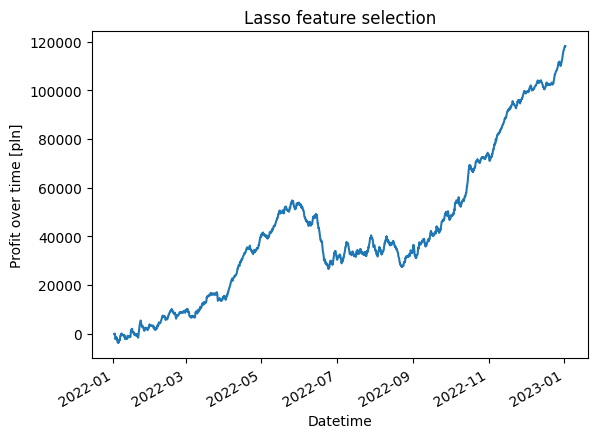

In [61]:
import matplotlib.pyplot as plt
pnls['lasso_feature_selection_0.5.pkl'].cumsum().plot()
plt.title('Lasso feature selection')
plt.xlabel('Datetime')
plt.ylabel('Profit over time [pln]')
plt.savefig('charts\exp5_lasso_feature_selection_0.5.png', format='png')

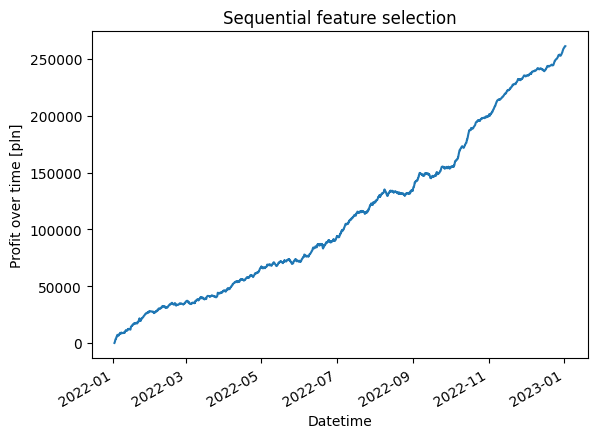

In [62]:
import matplotlib.pyplot as plt
pnls['sequential_feature_selection_20.pkl'].cumsum().plot()
plt.title('Sequential feature selection')
plt.xlabel('Datetime')
plt.ylabel('Profit over time [pln]')
plt.savefig('charts\exp5_sequential_feature_selection_20.png', format='png')

In [63]:
for i,j in (results.groupby('strategy').tail(1)[['strategy']]).iterrows():
    print(j.values[0]+':')
    print(' '+i)


lasso_feature_selection:
 lasso_feature_selection_5.pkl
RFE_feature_selection:
 RFE_feature_selection_5.pkl
xgboost_feature_selection:
 xgboost_feature_selection_15.pkl
mcut_feature_selection:
 mcut_feature_selection_75.pkl
relief_algorithm:
 relief_algorithm_20.pkl
correlation_features:
 correlation_features_5.pkl
sequential_feature_selection:
 sequential_feature_selection_20.pkl


In [11]:
res2 = pd.DataFrame(columns=['strategy', 'mean', 'count', 'sum', 'winrate', 'mean_std'])
pnls = {}
for hiperparams_version, strategy in (results.groupby('strategy').tail(1)[['strategy']]).iterrows():
    strat = strategy.values[0]
    data = pd.read_pickle('../data/broaded_df')
    d, pvs = backtest2strategy[strat](data, pd.read_pickle(f'../data/{hiperparams_version}')[:-1], 'test')
    pnl = (np.sign(d.pred) * d.marg).dropna()
    res2.loc[hiperparams_version] = [strat, pnl.mean(), pnl.count(), pnl.sum(), winrate(pnl), mean_std(pnl)]
    pnls[strat] = pnl
    clear_output()  
        
        
        

In [14]:
res2.groupby('strategy').apply(lambda x: x[(x['mean_std']==x['mean_std'].max())]).sort_values(['mean_std', 'winrate'], ascending=False).reset_index(drop=True).groupby('strategy').head(1).reset_index(drop=1)

,strategy,mean,count,sum,winrate,mean_std
0,RFE_feature_selection,2.247668,2183,4906.66,0.497939,0.031214
1,lasso_feature_selection,-0.020165,2183,-44.02,0.506184,-0.000280
2,sequential_feature_selection,-0.710683,2183,-1551.42,0.502978,-0.009865
3,relief_algorithm,-3.606413,2183,-7872.80,0.499313,-0.050122
4,mcut_feature_selection,-4.227494,2183,-9228.62,0.493816,-0.058782
5,correlation_features,-6.480092,2183,-14146.04,0.491525,-0.090314
6,xgboost_feature_selection,-6.837609,2183,-14926.50,0.454421,-0.095341


In [65]:
res2

,strategy,mean,count,sum,winrate,mean_std
lasso_feature_selection_5.pkl,lasso_feature_selection,-0.020165,2183,-44.02,0.506184,-0.000280
RFE_feature_selection_5.pkl,RFE_feature_selection,2.247668,2183,4906.66,0.497939,0.031214
xgboost_feature_selection_15.pkl,xgboost_feature_selection,-6.837609,2183,-14926.50,0.454421,-0.095341
mcut_feature_selection_75.pkl,mcut_feature_selection,-4.227494,2183,-9228.62,0.493816,-0.058782
relief_algorithm_20.pkl,relief_algorithm,-3.606413,2183,-7872.80,0.499313,-0.050122
correlation_features_5.pkl,correlation_features,-6.480092,2183,-14146.04,0.491525,-0.090314
sequential_feature_selection_20.pkl,sequential_feature_selection,-0.710683,2183,-1551.42,0.502978,-0.009865


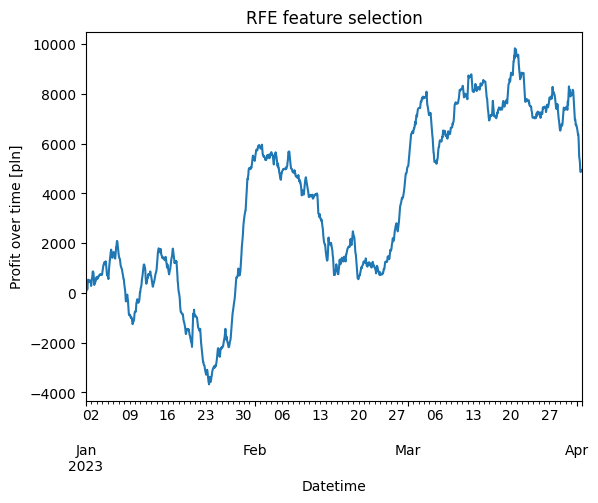

In [69]:
import matplotlib.pyplot as plt
pnls['RFE_feature_selection'].cumsum().plot()
plt.title('RFE feature selection')
plt.xlabel('Datetime')
plt.ylabel('Profit over time [pln]')
plt.savefig('charts\exp5_test_RFE_feature_selection_5.png', format='png')

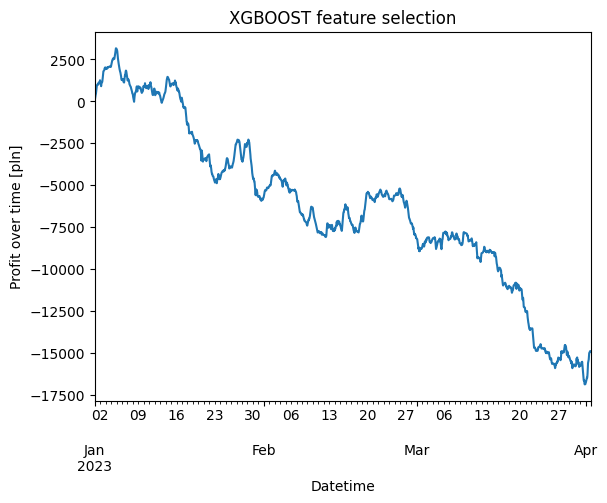

In [70]:
import matplotlib.pyplot as plt
pnls['xgboost_feature_selection'].cumsum().plot()
plt.title('XGBOOST feature selection')
plt.xlabel('Datetime')
plt.ylabel('Profit over time [pln]')
plt.savefig('charts\exp5_test_xgboost_feature_selection.png', format='png')

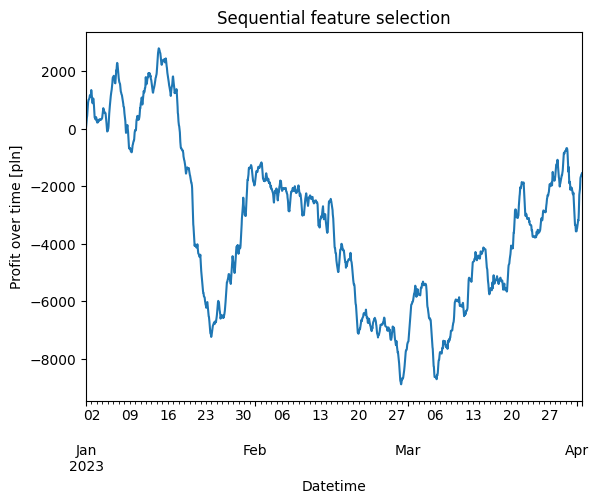

In [68]:
import matplotlib.pyplot as plt
pnls['sequential_feature_selection'].cumsum().plot()
plt.title('Sequential feature selection')
plt.xlabel('Datetime')
plt.ylabel('Profit over time [pln]')
plt.savefig('charts\exp5_test_sequential_feature_selection_20.png', format='png')